# target_ymごとの価格推移分析

`train` データに含まれる `target_ym`（ターゲット年月）単位で価格 (`money_room`) がどの程度変化しているのかを把握し、横ばい期間の有無も確認するノートブックです。



In [ ]:
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import japanize_matplotlib  # noqa: F401

pd.options.display.max_rows = 200
sns.set_theme(style="whitegrid")

ROOT = Path("/Users/takamiya/work/0000_repos/signate_comp_2nd")
TRAIN_PATH = ROOT / "data/raw/signate/train.csv"

usecols = ["target_ym", "money_room", "bukken_type"]
train = pd.read_csv(TRAIN_PATH, usecols=usecols)
train = train.dropna(subset=["money_room"]).copy()
train["money_room"] = train["money_room"].astype(float)
train["target_ym"] = pd.to_datetime(train["target_ym"].astype(str), format="%Y%m")
train["type_label"] = train["bukken_type"].map({1202: "kodate", 1302: "mansion"})

print(f"Loaded rows: {len(train):,}")
train.head()



Loaded rows: 363,924


,target_ym,money_room,bukken_type,type_label
0,2019-01-01,13980000.0,1202,kodate
1,2019-01-01,24480000.0,1202,kodate
2,2019-01-01,24480000.0,1202,kodate
3,2019-01-01,16300000.0,1202,kodate
4,2019-01-01,18800000.0,1302,mansion


In [ ]:
summary = (
    train.groupby("target_ym")["money_room"].agg(
        count="size",
        mean="mean",
        median="median",
        q1=lambda s: s.quantile(0.25),
        q3=lambda s: s.quantile(0.75),
    )
    .sort_index()
)
summary["median_diff"] = summary["median"].diff()
summary["median_pct_change"] = summary["median"].pct_change() * 100
summary["mean_pct_change"] = summary["mean"].pct_change() * 100

summary


,count,mean,median,q1,q3,median_diff,median_pct_change,mean_pct_change
target_ym,,,,,,,,
2019-01-01,36516,2.440028e+07,20800000.0,13800000.0,30500000.0,NaN,NaN,NaN
2019-07-01,45775,2.538057e+07,21800000.0,13800000.0,31800000.0,1000000.0,4.807692,4.017549
2020-01-01,51452,2.543315e+07,21800000.0,13900000.0,31800000.0,0.0,0.000000,0.207148
2020-07-01,52514,2.530174e+07,21500000.0,13900000.0,31500000.0,-300000.0,-1.376147,-0.516671
2021-01-01,45459,2.507972e+07,20980000.0,13800000.0,30800000.0,-520000.0,-2.418605,-0.877507
2021-07-01,42642,2.615098e+07,21900000.0,13990000.0,32800000.0,920000.0,4.385129,4.271421
2022-01-01,43103,2.720653e+07,22800000.0,14800000.0,33990000.0,900000.0,4.109589,4.036379
2022-07-01,46463,2.834017e+07,23800000.0,14990000.0,35000000.0,1000000.0,4.385965,4.166802


AttributeError: module 'matplotlib.ticker' has no attribute 'DateFormatter'

/Users/takamiya/work/0000_repos/signate_comp_2nd/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/takamiya/work/0000_repos/signate_comp_2nd/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20307 (\N{CJK UNIFIED IDEOGRAPH-4F53}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/takamiya/work/0000_repos/signate_comp_2nd/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/takamiya/work/0000_repos/signate_comp_2nd/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 21029 (\N{CJK UNIFIED IDEOGRAPH-5225}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/takamiya/work/0000_repos/signate_comp_2nd/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: 

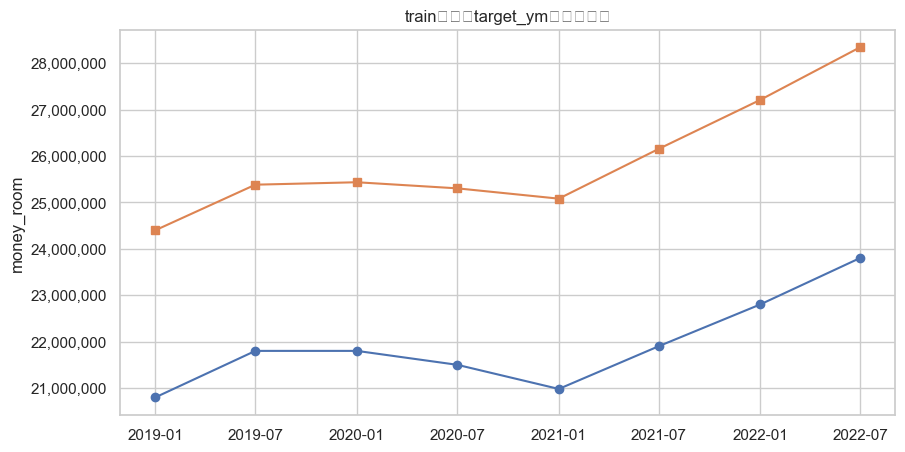

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(summary.index, summary["median"], marker="o", label="median")
ax.plot(summary.index, summary["mean"], marker="s", label="mean")
ax.set_title("train全体のtarget_ym別価格推移")
ax.set_ylabel("money_room")
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))
ax.xaxis.set_major_formatter(mtick.DateFormatter("%Y-%m"))
ax.tick_params(axis="x", rotation=45)
ax.legend()
plt.tight_layout()
plt.show()



In [ ]:
summary_type = (
    train.groupby(["type_label", "target_ym"])["money_room"].agg(
        count="size",
        mean="mean",
        median="median",
    )
    .sort_index()
    .reset_index()
)
summary_type["median_diff"] = summary_type.groupby("type_label")["median"].diff()
summary_type["median_pct_change"] = summary_type.groupby("type_label")["median"].pct_change() * 100
summary_type


,type_label,target_ym,count,mean,median,median_diff,median_pct_change
0,kodate,2019-01-01,10970,2.075935e+07,17800000.0,NaN,NaN
1,kodate,2019-07-01,19477,2.407641e+07,19800000.0,2000000.0,11.235955
2,kodate,2020-01-01,24870,2.428849e+07,19800000.0,0.0,0.000000
3,kodate,2020-07-01,25114,2.427478e+07,19800000.0,0.0,0.000000
4,kodate,2021-01-01,22505,2.410766e+07,19800000.0,0.0,0.000000
5,kodate,2021-07-01,20689,2.482313e+07,20000000.0,200000.0,1.010101
6,kodate,2022-01-01,20541,2.532199e+07,20990000.0,990000.0,4.950000
7,kodate,2022-07-01,21144,2.613664e+07,21980000.0,990000.0,4.716532
8,mansion,2019-01-01,25546,2.596377e+07,22800000.0,NaN,NaN
9,mansion,2019-07-01,26298,2.634647e+07,22800000.0,0.0,0.000000


AttributeError: module 'matplotlib.ticker' has no attribute 'DateFormatter'

/Users/takamiya/work/0000_repos/signate_comp_2nd/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/takamiya/work/0000_repos/signate_comp_2nd/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20214 (\N{CJK UNIFIED IDEOGRAPH-4EF6}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/takamiya/work/0000_repos/signate_comp_2nd/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/takamiya/work/0000_repos/signate_comp_2nd/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/takamiya/work/0000_repos/signate_comp_2nd/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 125

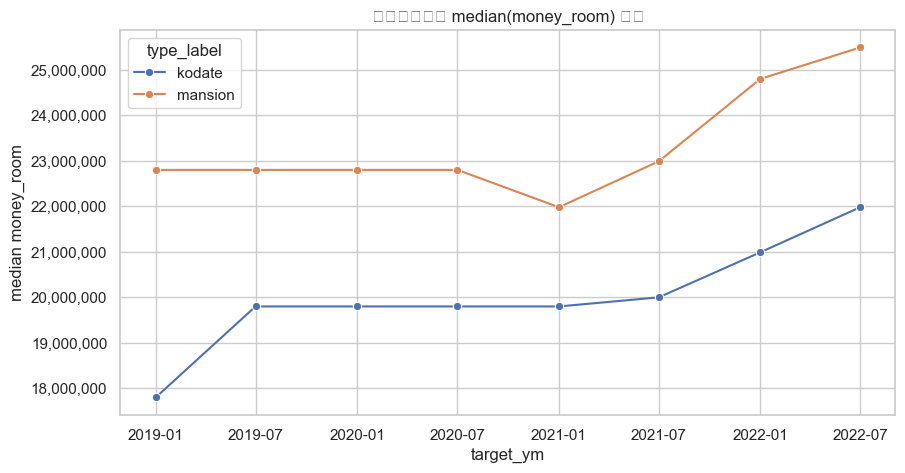

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    data=summary_type,
    x="target_ym",
    y="median",
    hue="type_label",
    marker="o",
    ax=ax,
)
ax.set_title("物件タイプ別 median(money_room) 推移")
ax.set_ylabel("median money_room")
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))
ax.xaxis.set_major_formatter(mtick.DateFormatter("%Y-%m"))
ax.tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
# medianが横ばい（前期と同値）となるtarget_ymの有無を確認
summary["is_flat"] = summary["median_diff"].fillna(0).eq(0)
flat_overall = summary["is_flat"].iloc[1:].sum()

flat_type = (
    summary_type.groupby("type_label").apply(lambda df: df["median_diff"].iloc[1:].eq(0).sum())
)

print(f"全体で横ばいとなったtarget_ym数: {int(flat_overall)} / {len(summary)}")
print(flat_type)



全体で横ばいとなったtarget_ym数: 1 / 8
type_label
kodate     3
mansion    3
dtype: int64


/var/folders/xv/rygbbjfn1_3g64qmfrp_4_q40000gn/T/ipykernel_68959/3259211596.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_type.groupby("type_label").apply(lambda df: df["median_diff"].iloc[1:].eq(0).sum())
